일정 시간 간격으로 어떤 값을 기록한 데이터에서는 시계열 데이터가 매우 중요함.  
시계열 데이터를 다룰 줄 알아야함.  

# datetime 오브젝트 사용하기
datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리  
datetime 라이브러리에는 날짜를 처리하는 date 오브젝트, 시간을 처리하는 time 오브젝트, 날짜와 시간을 모두 처리하는 datetime 오브젝트가 포함되어 있음

In [1]:
from datetime import datetime

now, today 메서드를 사용하면 현재 시간을 출력할 수 있음

In [4]:
now = datetime.now()
print(now)

2021-03-10 16:00:24.632764


In [5]:
today = datetime.today()
print(today)

2021-03-10 16:00:24.759683


datetime 오브젝트를 생성할때 시간을 직접 입력하여 인자로 전달  

In [9]:
# now 메서드는 밀리초 단위까지 구함
t1 = datetime.now()
# 년월일
t2 = datetime(1970, 1, 1) 
# 년월일, 시분초
t3 = datetime(1970, 12, 12, 13, 24, 34)
print(t1)
print(t2)
print(t3)

2021-03-10 16:02:15.900356
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime 오브젝트를 사용하는 이유 중 하나는 시간계산을 할 수 있다는 점 

In [10]:
diff1 = t1 - t2
print(diff1)
print(type(diff1))

18696 days, 16:02:15.900356
<class 'datetime.timedelta'>


In [11]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-18697 days, 7:57:44.099644
<class 'datetime.timedelta'>


# 문자열을 datetime 오브젝트로 변환하기
경우에 따라서는 시계열 데이터를 문자열로 **저장**해야할 때도 있음.  
하지만 문자열은 시간계산을 할 수 없기 때문에 datetime 오브젝트로 변환해주어야 함.  
이번에는 to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환하는 방법에 대해 알아봄  

ebola 데이터 셋을 불러옴

In [12]:
import pandas as pd 
import os

ebola = pd.read_csv('data/country_timeseries.csv')

ebola info 를 살펴보면 Date의 날짜열의 데이터 타입이 object(문자열)인 것을 볼 수 있음 

In [13]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

to_datetime 메서드를 사용하면 Date열의 자료형을 datetime 오브젝트로 변환할 수 있음.  

In [14]:
# to_datetime 메서드를 활용하여 문자열->datetime 변환 후, 새로운 열로 추가
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

시간형식 지정자(%d, %m, %y) 와 기호 (/, -)를 적절히 조합하여 format 메서드와 함께 정리된 datetime 오브젝트를 얻을 수 있음

In [30]:
test_df1 = pd.DataFrame({'order_day': ['01/01/15', '02/01/15', '03/01/15']})

# 일, 월, 년
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
# 월, 일, 년
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
# 년, 월, 일
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [32]:
test_df2 = pd.DataFrame({'order_day': ['01-01-15', '02-01-15', '03-01-15']})

# 구분자 '-' 형식
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


|시간 형식 지정자|의미|결과|
|:---:|:---:|:---:|
|%a|요일출력|Sun, Mon...Sat|
|%A|요일출력(긴 이름)|Sundat, Monday ..., Saturday|
|%w|요일출력(숫자, 0부터 일요일)|0, 1, ...,6|
|%d|날짜출력(2자리로 표시)|
|%b|월 출력|
|%B|월 출력(긴 이름)|
|%m|월 출력(숫자)|
|%y|년 출력(2자리로 표시)|
|%Y|년 출력(4자리로 표시)|
|%H|시간출력(24시간)|
|%I|시간출력(12시간)|
|%p|AM 또는 PM 출력|
|%M|분 출력(2자리로 표시)|
|&S|초 출력(2자리로 표시)|
|&f|마이크로초 출력|
|&z|UTC 차이 출력(+HHMM이나 -HHMM 형태)|
|&Z|기준 지역 이름 출력|
|%j|올해의 지난 일 수 출력(1일, 2일...)|
|%U|올해의 지난 주 수 출력(1주, 2주...)|
|%c|날짜와 시간 출력|
|%x|날짜 출력|
|%X|시간 출력|
|%G|년 출력(ISO 8601 형식)|
|%u|요일 출력(ISO 8601 형식)|
|%V|올해의 지난 주 수 출력(ISO 8601 형식)|


# 시간 데이터를 잘라내기
now 메서드로 얻은 현재 시간의 시계열 데이터는 정밀한 단위까지 시간을 표현(밀리단위)  
원하는 시계열 데이터의 시간 요소가 연도,월,일이라면 now 메서드로 얻은 시계열 데이터를 잘라서 써야함  
다음은 strftime 메서드와 시간 형식 지정자를 이용하여 원하는 시간요소만 가져옴

In [36]:
now = datetime.now()
print(now)
print(type(now))

2021-03-10 16:43:16.796361
<class 'datetime.datetime'>


In [35]:
# strftime 은 날짜를 문자열로 변환
nowDate = now.strftime('%Y-%m-%d')
print(nowDate)
print(type(nowDate))

2021-03-10
<class 'str'>


In [38]:
# 시간, 분, 초
nowTime = now.strftime('%H:%M:%S')
print(nowTime)
print(type(nowTime))

16:43:16
<class 'str'>


In [39]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)
print(type(nowDatetime))

2021-03-10 16:43:16
<class 'str'>


# datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
데이터를 불러올때 datetime 오브젝트로 사용할 열을 지정하는 방법

In [40]:
ebola_datetime = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
print(ebola_datetime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# datetime 오브젝트에서 날짜 정보 추출하기
datetime 오브젝트에는 년, 월, 일 과 같은 날짜 정보를 따로 저장하고 있는 속성이 이미 준비되어 있음  

In [41]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


datetime 오브젝트(d1)의 year, month, day 속성을 이용하면 년,월,일 정보를 바로 추출할 수 있음

In [44]:
print(d1[0].year)

2018


In [46]:
print(d1[0].month)

5


In [45]:
print(d1[0].day)

16


# dt 접근자로 시간 데이터 정리하기
문자열을 처리하려면 str 로 접근하여, 문자열 속성이나 메서드를 사용해야함.  
datetime 오브젝트로 마찬가지로, dt 접근자를 사용하여 datetime 속성이나, 메서드를 사용하여 시계열 데이터를 처리할 수 있음.  

* dt 접근자를 사용하지 않고 년,월,일 데이터를 추출

In [52]:
ebola = pd.read_csv('data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
ebola[['Date', 'date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [55]:
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


* 위의 방법은 특정 데이터를 인덱스로 접근해야하기 때문에 불편, dt 접근자로 date_dt 열에 한번에 접근한 다음 year 속성을 이용해 연도값을 추출할 수 있음

In [59]:
# dt 접근자 + year
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [60]:
# dt 접근자 + month
ebola['month'] = ebola['date_dt'].dt.month
print(ebola[['Date', 'date_dt', 'month']].head())

         Date    date_dt  month
0    1/5/2015 2015-01-05      1
1    1/4/2015 2015-01-04      1
2    1/3/2015 2015-01-03      1
3    1/2/2015 2015-01-02      1
4  12/31/2014 2014-12-31     12


In [62]:
# dt 접근자 + day
ebola['day'] = ebola['date_dt'].dt.day
print(ebola[['Date', 'date_dt', 'day']].head())

         Date    date_dt  day
0    1/5/2015 2015-01-05    5
1    1/4/2015 2015-01-04    4
2    1/3/2015 2015-01-03    3
3    1/2/2015 2015-01-02    2
4  12/31/2014 2014-12-31   31


ebola 새로 추가한 date_dt, year, month, day 열의 자료형을 보면 date_dt만 datetime 형이고, 나머지는 int 형식인 것을 알 수 있습니다.

In [63]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

# 사례별 시계열 데이터 계산

## 에볼라 최초 발생일 계산해보기

ebola 데이터는 시간이 역순으로 구성되어 있음.  즉 시간 순으로 확인하려면 데이터프레임의 마지막 부터 시작됨.  

In [66]:
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,3/27/2014,5,103.0,8.0,6.0
118,3/26/2014,4,86.0,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN


에볼라가 발생하기 시작한 날은 2014년 03월 22일임  
min 메서드를 활용하여 최초 발병일을 찾을 수도 있음

min 메서드로 계산된 자료형은 Timestamp 자료형을 갖는데 Datetime자료형과 호환되는 자료형임  
둘다 날짜를 다루는 자료형이지만 약간의 차이가 있음  
[datetime과 timestamp의 차이](http://blog.naver.com/PostView.nhn?blogId=gigar&logNo=60115731039&redirect=Dlog&widgetTypeCall=true)

In [68]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Date에서 최초 발생일을 빼게 되면 발생일로부터 얼마나 지났는지 알 수 있음

In [71]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()
print(ebola[['Date', 'date_dt', 'Day', 'outbreak_d']].head())

         Date    date_dt  Day outbreak_d
0    1/5/2015 2015-01-05  289   289 days
1    1/4/2015 2015-01-04  288   288 days
2    1/3/2015 2015-01-03  287   287 days
3    1/2/2015 2015-01-02  286   286 days
4  12/31/2014 2014-12-31  284   284 days


## 파산한 은행의 개수 계산하기
파산한 은행 데이터로 분기별로 파산한 은행이 얼마나 되는지 계산

In [73]:
banks = pd.read_csv('data/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


Closing Date, Updated Date 열의 자료형은 문자열(object), 두 열을 to_datetime으로 불러옴 

In [75]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB


In [76]:
banks = pd.read_csv('data/banklist.csv', parse_dates=[5, 6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB


dt접근자와 quarter 속성을 이용하면 은행이 파산한 분기를 알 수 있음  
은행이 파산한 연도, 분기를 새로운 열로 추가 

In [77]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


연도별로 파산한 은행의 개수를 구하기 위해 groupby 메서드를 활용함  

In [90]:
closing_year = banks.groupby('closing_year').size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


각 연도별, 분기별 파산한 은행의 개수

In [91]:
closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

연도별, 분기별 파산 은행 수 그래프로 시각화

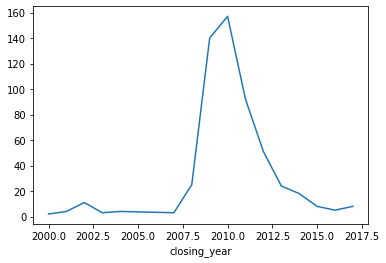

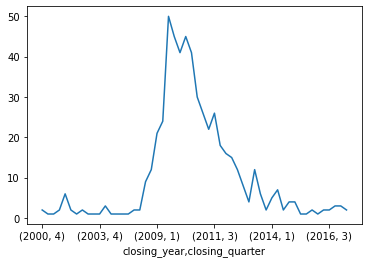

In [101]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax = closing_year.plot()

fig, ax = plt.subplots(1, 1)
ax = closing_year_q.plot()
plt.show()

## 테슬라 주식 데이터로 시간 계산하기
pandas-datareader 라이브러리로 주식 데이터 불러오기 

get_data_quanal 메서드에 TSLA 문자열을 전달하여 테슬라의 주식 데이터를 내려받은 다음, to_csv 메서드를 사용하여 csv파일로 저장

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

tesla = pdr.get_data_quandl('TSLA')

tesla.to_csv('data/tesla_stock_quandl.csv')

In [138]:
tesla = pd.read_csv('data/tesla_stock_quandl.csv', parse_dates=['Date'])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


dt 접근자로 2010년 6월 데이터만 추출

In [139]:
tesla.loc[(tesla['Date'].dt.year == 2010) & (tesla.Date.dt.month == 6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


# datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기
datetime 오브젝트를 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있음.  

In [140]:
# Date 열을 tesla 데이터프레임의 인덱스로 지정한 것
tesla.index = tesla['Date']
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


datetime 오브젝트를 인덱스로 지정하면 원하는 시간의 데이터를 바로 추출가능  
:을 붙여야 실행 됨.  

In [143]:
print(tesla['2015':].iloc[:5, :5])

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [144]:
print(tesla['2010-06':].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


# 시간 간격을 인덱스로 설정하여 데이터 추출하기

In [145]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,2822 days


In [146]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


최초 5일의 데이터를 추출

In [147]:
print(tesla['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


# 시간 범위 생성하여 인덱스로 지정하기
특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보기, 임의의 시간 범위를 생성하여 인덱스로 지정

에볼라 데이터 셋 사용, 앞쪽 데이터를 보면 2015년 01월 01일 데이터가 누락되어있음 

In [148]:
# 2015-01-01 데이터 누락
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=[0])
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [150]:
# 2014-03-23 데이터 누락
ebola.iloc[-5:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


date_range 메서드를 사용하여 2014년 12월 31일 ~ 2015년 01월 05일 사이의 시간 인덱스를 생성한 것

In [151]:
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

상위 5개 행만 새로운 데이터프레임에 생성함  
Date열을 인덱스로 먼저 지정해야 오류가 발생하지 않음  
반드시 Date 열을 인덱스로 지정한 다음 생성한 시간 범위를 인덱스로 지정해야 함

In [162]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5['Date']
ebola_5 = ebola_5.reindex(head_range)
ebola_5.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0
2015-01-01,NaT,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0


# 시간 범위의 주기 설정하기

시간 범위를 인덱스로 지정하면 DatetimeIndex 자료형이 만들어 집니다.  그리고 DatetimeIndex에는 freq속성이 포함되어 있음  
freq 속성값을 지정하면 시간 간격을 조절하여 DatetimeIndex를 만들 수 있음 

|시간 주기|설명|
|:---:|:---:|
|B|평일만 포함|
|C|사용자가 정의한 평일만 포함|
|D|달력 일자 단위|
|W|주간 단위|
|M|월 마지막 날만 포함|
|SM|15일과 월 마지막날만 포함|
|BM|M 주기의 값이 휴일이면 제외하고 평일만 포함|
|CBM|BM에 사용자 정의 평일을 적용|
|MS|월 시작일만 포함|
|SMS|월 시작일과 15일만 포함|
|BMS|MS 주기의 값이 휴일이면 제외하고 평일만 포함|
|CBMS|BMS에 사용자 정의 평일을 적용|
|Q|3, 6, 9, 12월 분기 마지막날만 포함|
|BQ|3, 6, 9, 12월 분기 마지막 날이 휴일이면 제외하고 평일만 포함|
|QS|3, 6, 9, 12월 분기 시작일만 포함|
|BQS|3, 6, 9, 12월 분기 시작일이 휴일이면 제외하고 평일만 포함|
|A|년의 마지막 날만 포함|
|BA|년의 마지막 날이 휴일이면 제외하고 평일만 포함|
|AS|년의 시작일만 포함|
|BAS|년의 시작일이 휴일이면 제외하고 평일만 포함|
|BH|평일을 시간 단위로 포함(09:00~16:00)|
|H|시간 단위로 포함(00:00~00:00)|
|T|분 단위로 포함|
|S|초 단위로 포함|
|L|밀리초 단위로 포함|
|U|마이크로초 단위로 포함|
|N|나노초 단위로 포함|



In [164]:
# 평일만 포함
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


# 에볼라 발병 시간 비교하기
나라별로 에볼라의 확산 속도를 비교하려면 발생하기 시작한 날짜를 옮기는 것이 좋음  

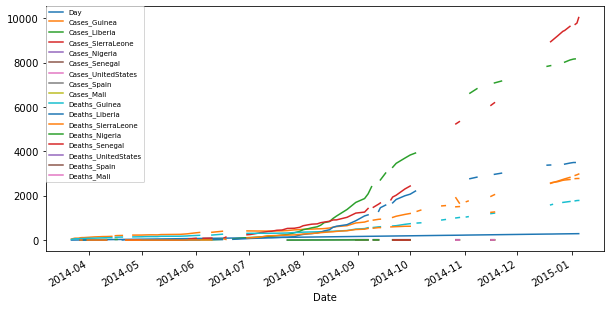

In [166]:
import matplotlib.pyplot as plt 

ebola.index = ebola['Date']

fig, ax = plt.subplots(figsize=(10, 5))
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0)
plt.show()

각 나라의 에볼라 발병일이 달라 그래프가 그려지기 시작한 지점이 각기 다름  
각 나라의 발병일을 가장 처음 에볼라가 발생한 Guinea와 동일한 위치로 옮겨야 나라별 에볼라 확산 속도를 제대로 비교할 수 있음

In [167]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


Liberia 는 발병일을 4만큼 옮겨야 함

In [182]:
ebola = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])
ebola.head().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [183]:
ebola.tail().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


중간에 없는 날짜도 포함시켜야 비교가 가능함

In [184]:
# 중간에 없는 날짜 포함 시키기
ebola.index = ebola['Date']
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())

In [185]:
# 시간 순서를 맞추기 위해 순서 뒤집기
new_idx = reversed(new_idx)
new_idx

reindex 를 사용하여 새로 생성한 인덱스를 새로운 인덱스로 지정

In [186]:
# 시간에 대한 누락값은 NaT로 표시됨
ebola = ebola.reindex(new_idx)
ebola.head().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN


In [187]:
ebola.tail().iloc[:, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2014-03-26,2014-03-26,4.0,86.0,NaN,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,NaN,NaN
2014-03-23,NaT,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,NaN,NaN


각 나라의 에볼라 발병일 옮기기
last_valid_index, first_valid_index 메서드를 사용하여, 각 나라의 에볼레 발병일을 구하는 것  
각각의 메서드는 유효한 값이 있는 첫번째와 마지막 인덱스 반환 

In [188]:
last_valid = ebola.apply(pd.Series.last_valid_index)
last_valid

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [189]:
first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]

각 나라의 에볼라 발병일 동일한 출발선으로 옮기려면 에볼라가 가장 처음 발병한 날에서, 각 나라의 에볼라 발병일을 뺀 만큼(shift_values) 옮기면 됨.

In [191]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [192]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


각 나라의 에볼라 발병일을 옮기면 됨.  
다음은 shift 메서드를 사용하여 모든 열의 값을 shift_values 값만큼 옮긴 것  
shift 메서드는 인잣값 만큼 데이터를 밀어내는 메서드

In [193]:
ebola_dict = {}
for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted

ebola_dict 에는 시간을 다시 설정한 데이터가 딕셔너리 형태로 저장되어 있음  

In [197]:
ebola_shift = pd.DataFrame(ebola_dict)

In [198]:
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


인덱스를 Day 열로 지정하고 그래프에 필요없는 Date, Day 열은 삭제 하면 그래프를 그리기 위한 데이터프레임이 완성됨  

In [200]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


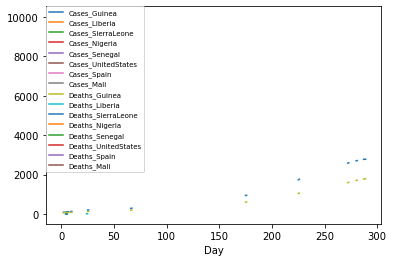

In [201]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()